<h1 style="text-align: center;">Tuwaiq Academy</h1>
<h2 style="text-align: center;">Data Science and Machine Learning Bootcamp</h2>
<h2 style="text-align: center;">Usecase 5 - Job Posting in Saudi Arabia 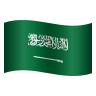</h2>


In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import ipyvizzu
from ydata_profiling import ProfileReport 
import ast
from hijridate import Gregorian, Hijri
from googletrans import Translator
import arabic_reshaper
from bidi.algorithm import get_display
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

C:\Users\sakur\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
jadarat = pd.read_csv('Data/Jadarat_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
#Viewing the first five rows of Jadarat dataset
jadarat.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [5]:
#Viewsing the shape of Jadarat dataset 
jadarat.shape # rows, cols

(1470, 18)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
#Creating profilign report using ydata
profile = ProfileReport(jadarat, title="Jadarat Profiling Report")

In [7]:
#Displaying the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
jadarat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [9]:
# A few questions arise from here:
# 1. Why are they few dates? why was this specific date (09/06/1444) the most repeated?
# 2. Why did private companies rank at the top?
# 3. Why did Riyadh rank at the top?
jadarat.describe(include='object')

job_title    job_date  \
count       1470        1470   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1470   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1470   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1470      1470      1470   
unique                                                886       894         2   
top     شركه العرض المتقن للخدمات التجارية شركة مساهمة...  1-169123       خاص   
freq                                                   16        16      1465   

          comp_size       eco_activity  \
count          1456               1380   
unique            7                361   
top     صغيرة فئة ب  المطاعم مع الخدمة   
freq            635                 65   

                                          qualif  region          city  \
count                                        780    1470          1470   
unique                                       615      14           114   
top     ['Language data', 'الانجليزية', 'متوسط']  الرياض  AR RIYADH...   
freq                                          28     622           523   

                    benefits   contract positions    exper gender  
count                   1470       1470      1470     1470   1470  
unique                   393          2        25        6      3  
top     ['Salary', '4000.0']  دوام كامل     0 / 1  0 Years   both  
freq                     449       1448       853      833    587

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### Evaluating the data's source trustworthiness:
<p style="font-size: 18px;">The Job Posting in Saudi Arabia Dataset was found on Kaggle and the owner, Moayad Alkhozayem, collected them from Jadarat website which is the unified national employment platform in Saudi Arabia.</p>


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### Evaluating the timeliness of the dataset:
<p style="font-size: 18px;">After connecting with the owner of the dataset, Moayad Alkhozayem, it was clarified that the data were collected in 2023, at the same time as some of the job posts' dates.</p>


#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


What I have noticed here:

- The qualif column should be renamed to qualification for clarity.
- The benefits column has a list stored as an object. Inside this list, there is a salary and some benefits, which means the column should be separated into salary and benefits.
- The positions column could also be separated into total_positions and occupied_positions columns for further analysis.
- The exper column values should be of type int and rename it for calrity. 

These tasks will be done in Data Cleaning

In [5]:
jadarat.head(3)

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   

                                           qualif           region  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                             NaN  المنطقة الشرقية   
2        ['Language data', 'الانجليزيه', 'محترف']           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both

In [4]:
#Everything seems correct here
jadarat['job_title'].unique()

array(['محاسب', 'بائع', 'أخصائي عمليات موارد بشرية', 'ميكانيكي سيارات',
       'مراقب كاميرات أمنية', 'سكرتير تنفيذي', 'مدير مكتب',
       'أخصائي إدارة مشاريع', 'مصمم جرافيك', 'أخصائي ذكاء أعمال',
       'محلل بيانات', 'مدير حساب عميل', 'مدخل بيانات', 'مطور برامج',
       'أخصائي إدارة اداء', 'كيميائي', 'مهندس زراعي',
       'محلل نظم المعلومات', 'مدير عام', 'مساعد إداري',
       'كاتب علاقات حكومية', 'مندوب مبيعات', 'معلم حضانة', 'فني كيميائي',
       'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'مدير فرع',
       'موظف استقبال فندق', 'أخصائي تسويق',
       'كاتب استعلامات مركز خدمة عملاء', 'أخصائي خدمة عملاء',
       'أخصائي جودة', 'معلم صفوف أولية', 'مساعد طب بيطري', 'صيدلي',
       'مهندس معماري داخلي', 'مهندس معماري', 'بائع مأكولات ومشروبات',
       'خطاط', 'منسق زهور', 'أخصائي تطوير إداري', 'مدير تسويق',
       'مدير خدمة العملاء', 'مندوب مشتريات', 'فني تدفئة وتهوية وتكييف',
       'مدير رقابة ادارية', 'موظف صندوق محاسبة', 

In [7]:
# Checking the benefits column to investigate whether the values contain only salary.
jadarat['benefits'].unique()

array(["['Salary', '5000.0']", "['Salary', '4000.0']",
       "['Salary', '4500.0']", "['Salary', '6000.0']",
       "['Salary', '8000.0']", "['Salary', '10000.0']",
       "['Salary', '7200.0', 'Benefits', 'بدل نقل 800 ريال']",
       "['Salary', '7000.0']", "['Salary', '3000.0']",
       "['Salary', '9000.0']", "['Salary', '12000.0']",
       "['Salary', '5500.0']", "['Salary', '8400.0']",
       "['Salary', '4000.0', 'Benefits', '500']",
       "['Salary', '4000.0', 'Benefits', '2000']",
       "['Salary', '4000.0', 'Benefits', 'تأمين طبي حسب نظام مكتب العمل']",
       "['Salary', '4000.0', 'Benefits', '1000 حسب الخبره']",
       "['Salary', '4000.0', 'Benefits', '4000 SR']",
       "['Salary', '3200.0', 'Benefits', '3200 ريال']",
       "['Salary', '5000.0', 'Benefits', '500 بدل نقل و500 بدل سكن وتامين طبي']",
       "['Salary', '4500.0', 'Benefits', 'حسب سنوات الخبرة']",
       "['Salary', '4500.0', 'Benefits', 'تارقت شهري', 'بونص سنوي']",
       "['Salary', '4500.0', 'Benefits', 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


1. The dataset is from collected from Jadart which means the sample aligns with the analysis objectives.

2. Variable Selection:


In [20]:
jadarat.head(2)

job_title    job_date                                           job_desc  \
0     محاسب  27/05/1444  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1      بائع  27/05/1444  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   

                                           qualif           region  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                             NaN  المنطقة الشرقية   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   

     exper gender  
0  0 Years   both  
1  0 Years   both

In [ ]:
# Dropping irrelevant columns for the analysis objectives in data cleaning

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [21]:
jadarat.duplicated().sum()

1

In [23]:
# Checking the duplicated row
# Dropping them in data cleaning
jadarat[jadarat.duplicated(keep=False)]

job_title    job_date                                           job_desc  \
1467     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1469     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                comp_name    comp_no comp_type    comp_size  \
1467  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   
1469  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   

     eco_activity                                             qualif  region  \
1467          NaN  ['Professional certificate \\ License data', '...  الرياض   
1469          NaN  ['Professional certificate \\ License data', '...  الرياض   

              city              benefits   contract positions     job_post_id  \
1467  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   
1469  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   

        exper gender  
1467  0 Years   both  
1469  0 Years   both

In [ ]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [72]:
#Display number missing values per column
jadarat.isna().sum()

job_title               0
job_date                0
job_desc                0
job_tasks               0
comp_name               0
comp_type               0
comp_size              14
eco_activity           90
qualifications        690
region                  0
city                    0
benefits                0
contract                0
positions               0
exper                   0
gender                  0
salary_sep              0
benefits_sep            0
occupied_positions      0
total_positions         0
experience (Years)      0
dtype: int64

In [ ]:
# Checking the first five null rows according to each column

In [75]:
jadarat[jadarat['comp_size'].isna()].head()

job_title    job_date  \
1296         مدير إداري  25/06/1444   
1393  موظف صندوق محاسبة  01/07/1444   
1399  موظف صندوق محاسبة  29/06/1444   
1401         وسيط عقاري  29/06/1444   
1409              محامي  29/06/1444   

                                               job_desc  \
1296  ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
1393  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1399  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1401  ['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...   
1409  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   

                                              job_tasks  \
1296  ['   المشاركة في تطوير الأهداف الرئيسية للشؤون...   
1393  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1399  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1401  ['   تقييم رغبات العملاء والميزانيات المحددة و...   
1409  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   

                                              comp_name comp_type comp_size  \
1296            مكتب تصميم المشاريع للاستشارات الهندسية       خاص       NaN   
1393                            مغاسل نسيم الفل للملابس       خاص       NaN   
1399                            مغاسل نسيم الفل للملابس       خاص       NaN   
1401                                مؤسسة فانس العقارية       خاص       NaN   
1409  شركة الخبراء المتحدون للمحاماة والاستشارات الق...       خاص       NaN   

     eco_activity                                     qualifications  \
1296          NaN                                                NaN   
1393          NaN                                                NaN   
1399          NaN                                                NaN   
1401          NaN  ['Skill data', 'عقاري', 'مبتدئ', 'Language dat...   
1409          NaN  ['Professional certificate \\ License data', '...   

               region  ...               benefits   contract positions  \
1296  المنطقة الشرقية  ...  ['Salary', '12400.0']  دوام كامل     0 / 1   
1393  المنطقة الشرقية  ...   ['Salary', '4000.0']  دوام كامل     0 / 3   
1399           الرياض  ...   ['Salary', '4000.0']  دوام كامل     0 / 2   
1401           الرياض  ...   ['Salary', '4000.0']  دوام كامل     0 / 1   
1409           الرياض  ...   ['Salary', '5000.0']  دوام كامل     0 / 2   

        exper gender salary_sep benefits_sep occupied_positions  \
1296  7 Years      M    12400.0     غير محدد                  0   
1393  0 Years   both     4000.0     غير محدد                  0   
1399  0 Years   both     4000.0     غير محدد                  0   
1401  0 Years      F     4000.0     غير محدد                  0   
1409  2 Years   both     5000.0     غير محدد                  0   

      total_positions  experience (Years)  
1296                1                   7  
1393                3                   0  
1399                2                   0  
1401                1                   0  
1409                2                   2  

[5 rows x 21 columns]

In [77]:
jadarat[jadarat['eco_activity'].isna()].head()

job_title    job_date  \
3     ميكانيكي سيارات  27/05/1444   
25           مدير عام  26/05/1444   
40           مدير فرع  25/05/1444   
42  موظف استقبال فندق  25/05/1444   
47               بائع  25/05/1444   

                                             job_desc  \
3   ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
25  ['المشاركة في وضع الأهداف العامة والسياسات وال...   
40  ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
42  ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
47  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   

                                            job_tasks  \
3   ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
25  ['   المشاركة في وضع الأهداف والسياسات والمباد...   
40  ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
42  ['   الحفاظ على قائمة الحجوزات، وتوفير السجلات...   
47  ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   

                                comp_name comp_type     comp_size  \
3                 مؤسسة لمكو لغيار الزيوت       خاص   صغيرة فئة ب   
25  ورشة اضواء المشاعل للحدادة والالمنيوم       خاص   صغيرة فئة أ   
40                      شركة الزي للتجارة       خاص  متوسطة فئة أ   
42               فندق قصر الواحة الفندقية       خاص   صغيرة فئة ب   
47  شركة مطعم بيت الشاورما لتقديم الوجبات       خاص  متوسطة فئة ج   

   eco_activity                                     qualifications  \
3           NaN  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...   
25          NaN  ['Skill data', 'حداد', 'متوسط', 'Language data...   
40          NaN  ['Language data', 'العربية', 'محترف', 'الانجلي...   
42          NaN  ['Skill data', 'الاستقبال الفندقي', 'محترف', '...   
47          NaN             ['Language data', 'العربية ', 'محترف']   

             region  ...                                           benefits  \
3   المنطقة الشرقية  ...                               ['Salary', '5000.0']   
25  المدينة المنورة  ...                               ['Salary', '4000.0']   
40  المنطقة الشرقية  ...  ['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...   
42           الرياض  ...  ['Salary', '4500.0', 'Benefits', 'تارقت شهري',...   
47           الرياض  ...                               ['Salary', '4000.0']   

     contract positions    exper gender salary_sep      benefits_sep  \
3   دوام كامل    0 / 10  0 Years      M     5000.0          غير محدد   
25  دوام كامل     0 / 1  0 Years      M     4000.0          غير محدد   
40  دوام كامل     0 / 1  2 Years   both   غير محدد  حسب سنوات الخبرة   
42  دوام كامل     0 / 4  2 Years   both   غير محدد          غير محدد   
47  دوام كامل    0 / 50  0 Years      M     4000.0          غير محدد   

   occupied_positions  total_positions  experience (Years)  
3                   0               10                   0  
25                  0                1                   0  
40                  0                1                   2  
42                  0                4                   2  
47                  0               50                   0  

[5 rows x 21 columns]

In [79]:
jadarat[jadarat['qualifications'].isna()].head()

job_title    job_date  \
1                بائع  27/05/1444   
14        مصمم جرافيك  26/05/1444   
15        مدخل بيانات  26/05/1444   
16         مطور برامج  26/05/1444   
17  أخصائي إدارة اداء  26/05/1444   

                                             job_desc  \
1   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
14  ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15        ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16  [' تحليل  وادارة تطبيقات باستخدام الأدوات البر...   
17  [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   

                                            job_tasks  \
1   ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
14  ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15        ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16  ['   تحليل  وادارة تطبيقات باستخدام الأدوات ال...   
17  [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   

                          comp_name comp_type     comp_size  \
1      شركة عالم الكهرباء للمقاولات       خاص  متوسطة فئة ب   
14  مكتب مدارات للاستشارات الهندسية       خاص  متوسطة فئة ب   
15  مكتب مدارات للاستشارات الهندسية       خاص  متوسطة فئة ب   
16  مكتب مدارات للاستشارات الهندسية       خاص  متوسطة فئة ب   
17  مكتب مدارات للاستشارات الهندسية       خاص  متوسطة فئة ب   

                                         eco_activity qualifications  \
1   تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...            NaN   
14                           إدارة المشاريع الانشائية            NaN   
15                           إدارة المشاريع الانشائية            NaN   
16                           إدارة المشاريع الانشائية            NaN   
17                           إدارة المشاريع الانشائية            NaN   

             region  ...               benefits   contract positions  \
1   المنطقة الشرقية  ...   ['Salary', '5000.0']  دوام كامل     0 / 3   
14             حائل  ...   ['Salary', '7000.0']  دوام كامل     0 / 1   
15             حائل  ...   ['Salary', '3000.0']  دوام كامل     0 / 2   
16             حائل  ...   ['Salary', '9000.0']  دوام كامل     0 / 1   
17             حائل  ...  ['Salary', '12000.0']  دوام كامل     0 / 1   

       exper gender salary_sep benefits_sep occupied_positions  \
1    0 Years   both     5000.0     غير محدد                  0   
14   4 Years      M     7000.0     غير محدد                  0   
15   2 Years      M     3000.0     غير محدد                  0   
16   4 Years      M     9000.0     غير محدد                  0   
17  10 Years      M    12000.0     غير محدد                  0   

    total_positions  experience (Years)  
1                 3                   0  
14                1                   4  
15                2                   2  
16                1                   4  
17                1                  10  

[5 rows x 21 columns]

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [169]:
# check columns types 
# job_date should be of type datetime
# salary_sep should be of type float
jadarat_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 1468
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           1448 non-null   object
 1   job_date            1448 non-null   object
 2   job_desc            1448 non-null   object
 3   job_tasks           1448 non-null   object
 4   comp_name           1448 non-null   object
 5   comp_type           1448 non-null   object
 6   comp_size           1448 non-null   object
 7   eco_activity        1448 non-null   object
 8   qualifications      1448 non-null   object
 9   region              1448 non-null   object
 10  city                1448 non-null   object
 11  benefits            1448 non-null   object
 12  contract            1448 non-null   object
 13  positions           1448 non-null   object
 14  exper               1448 non-null   object
 15  gender              1448 non-null   object
 16  salary_sep          1448 non-

In [ ]:
# go to clean them 

In [ ]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [25]:
jadarat.isna().sum()

job_title               0
job_date                0
job_desc                0
job_tasks               0
comp_name               0
comp_type               0
comp_size              14
eco_activity           89
qualifications        684
region                  0
city                    0
benefits                0
contract                0
positions               0
exper                   0
gender                  0
salary_sep              0
benefits_sep            0
occupied_positions      0
total_positions         0
experience (Years)      0
experience              0
dtype: int64

In [26]:
jadarat.shape

(1462, 22)

In [192]:
# Since comp_size has only 14 null values out of 1462 rows, then it is save to drop them
jadarat.dropna(subset=['comp_size'], inplace=True) # dropping rows that has null valus in comp_size

In [144]:
jadarat.isna().sum()

job_title               0
job_date                0
job_desc                0
job_tasks               0
comp_name               0
comp_type               0
comp_size               0
eco_activity           76
qualifications        678
region                  0
city                    0
benefits                0
contract                0
positions               0
exper                   0
gender                  0
salary_sep              0
benefits_sep            0
occupied_positions      0
total_positions         0
experience (Years)      0
dtype: int64

In [17]:
jadarat_filled = jadarat.copy()

# Fill missing values in 'eco_activity' column
jadarat_filled['eco_activity'] = jadarat_filled['eco_activity'].fillna('غير معروف')

In [18]:
jadarat_filled.head(2)

job_title    job_date                                           job_desc  \
0     محاسب  27/05/1444  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1      بائع  27/05/1444  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   

                      comp_name comp_type     comp_size  \
0      شركة مقر العالم للسفريات       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات       خاص  متوسطة فئة ب   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   

                                   qualifications           region  ...  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض  ...   
1                                             NaN  المنطقة الشرقية  ...   

               benefits   contract positions    exper gender salary_sep  \
0  ['Salary', '5000.0']  دوام كامل     0 / 1  0 Years   both     5000.0   
1  ['Salary', '5000.0']  دوام كامل     0 / 3  0 Years   both     5000.0   

  benefits_sep occupied_positions  total_positions  experience (Years)  
0     غير محدد                  0                1                   0  
1     غير محدد                  0                3                   0  

[2 rows x 21 columns]

In [19]:
# Fill missing values in 'qualifications' column based on mode within groups
jadarat_filled['qualifications'] = jadarat_filled.groupby(['job_title', 'job_tasks'])['qualifications'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'غير معروف')
)

In [20]:
jadarat_filled['qualifications'].value_counts()

qualifications
غير معروف                                                                                                                                                                                                                                        183
['Language data', 'الانجليزية', 'متوسط']                                                                                                                                                                                                         124
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                                                                                                                                                                      50
['Language data', 'الإنجليزية', 'متوسط']                                                                                                                                                                                                          37
['Lan

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

#### Fixing consistency issues

In [3]:
#Creating two columns to separate the benfit column
jadarat['salary_sep'] = np.nan
jadarat['benefits_sep'] = np.nan

In [4]:
# Seperating Salary from beneftis
# Write a comment about eval built-in function
def separate_salary_benefit(row):
    benefits = ast.literal_eval(row['benefits'])
    # Extracting salary 
    salary = benefits[1] if len(benefits) == 2 else 0 # 0 indicates that the salary is unknown 
    # Extracting benefit 
    benefit = benefits[3] if len(benefits) == 4 else 'غير محدد'  

    return pd.Series([salary, benefit], index=['salary_sep', 'benefits_sep'])
   

In [5]:
# Apply function to DataFrame
jadarat[['salary_sep', 'benefits_sep']] = jadarat.apply(separate_salary_benefit, axis=1)

In [179]:
jadarat.tail()

job_title    job_date  \
1465  مهندس تقنية معلومات  19/06/1444   
1466               سكرتير  19/06/1444   
1467                صيدلي  18/06/1444   
1468  مشغل آلة تشطيب رخام  18/06/1444   
1469                صيدلي  18/06/1444   

                                               job_desc  \
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name     comp_no comp_type  \
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال   9-2013930       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   

        comp_size                  eco_activity  \
1465  صغيرة فئة ب             المطاعم مع الخدمة   
1466  صغيرة فئة ب  أنشطة حاضنات ومسرعات الأعمال   
1467  صغيرة فئة ب                           NaN   
1468  صغيرة فئة أ                           NaN   
1469  صغيرة فئة ب                           NaN   

                                                 qualif           region  \
1465                                                NaN           الرياض   
1466  ['Skill data', 'فن التواصل', 'محترف', 'Languag...      مكة المكرمة   
1467  ['Professional certificate \\ License data', '...           الرياض   
1468  ['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...  المنطقة الشرقية   
1469  ['Professional certificate \\ License data', '...           الرياض   

              city                                           benefits  \
1465  AR RIYADH...                               ['Salary', '5500.0']   
1466     JEDDAH...                               ['Salary', '4000.0']   
1467  AR RIYADH...                               ['Salary', '7000.0']   
1468  AL KHUBAR...  ['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...   
1469  AR RIYADH...                               ['Salary', '7000.0']   

       contract positions     job_post_id    exper gender salary_sep  \
1465  دوام كامل     0 / 1  20202026400353  0 Years   both     5500.0   
1466  دوام كامل     0 / 1  20202026399849  2 Years   both     4000.0   
1467  دوام كامل     0 / 1  20202026399061  0 Years   both     7000.0   
1468  دوام كامل     0 / 3  20202026398972  0 Years      M          0   
1469  دوام كامل     0 / 1  20202026399061  0 Years   both     7000.0   

             benefits_sep  
1465             غير محدد  
1466             غير محدد  
1467             غير محدد  
1468  اجازة سنوية 30 يوم   
1469             غير محدد

In [6]:
jadarat['positions'][0].split(' / ')[0]

'0'

In [7]:
# Creating new columns for occupied positions and total positions 
jadarat['occupied_positions'] = np.nan
jadarat['total_positions'] = np.nan

In [8]:
# spliting values from positions column and assigning them to the new columns.
# casted after spliting because the separating will return a string.
jadarat['occupied_positions'] = jadarat['positions'].apply(lambda x : int(x.split(' / ')[0]))
jadarat['total_positions'] = jadarat['positions'].apply(lambda x : int(x.split(' / ')[1]))

In [9]:
# removing the word Years from column exper to create an experience column with type int
jadarat['experience (Years)'] = jadarat['exper'].apply(lambda x : int(x.split(' ')[0]))

In [10]:
print('Values count of exper column:', jadarat['exper'].value_counts())
print('Values count of experience column:', jadarat['experience (Years)'].value_counts())

Values count of exper column: exper
0 Years     833
2 Years     436
4 Years     153
7 Years      30
10 Years     15
12 Years      3
Name: count, dtype: int64
Values count of experience column: experience (Years)
0     833
2     436
4     153
7      30
10     15
12      3
Name: count, dtype: int64


In [11]:
# Renaming qualif column for calrity.
jadarat.rename({'qualif':'qualifications'}, axis=1, inplace=True)

In [12]:
# Checking new columns with renamed columns
jadarat.head(1)

job_title    job_date                                           job_desc  \
0     محاسب  27/05/1444  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                  comp_name   comp_no comp_type     comp_size  \
0  شركة مقر العالم للسفريات  1-317262       خاص  متوسطة فئة أ   

                  eco_activity  \
0  أنشطة وكالات السياحة والسفر   

                                   qualifications  ...   contract positions  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']  ...  دوام كامل     0 / 1   

      job_post_id    exper gender  salary_sep benefits_sep occupied_positions  \
0  20202026350419  0 Years   both      5000.0     غير محدد                  0   

  total_positions experience (Years)  
0               1                  0  

[1 rows x 23 columns]

#### Fixing relevance issues

In [13]:
jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualifications',
       'region', 'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'exper', 'gender', 'salary_sep', 'benefits_sep', 'occupied_positions',
       'total_positions', 'experience (Years)'],
      dtype='object')

In [14]:
# Dropping irrelevant columns for the analysis objectives.
jadarat.drop(['job_post_id', 'comp_no'], axis=1, inplace=True)

#### Fixing uniqueness issues

In [15]:
jadarat.drop_duplicates(inplace=True)

#### Fixing accuracy checking issues

In [21]:
# A new issue was found when an attempt was made to convert the job_date column from object to datetime.
# incorrect value for date (Publish date)
jadarat_filled['job_date'].unique()

array(['27/05/1444', '26/05/1444', '25/05/1444', '03/05/1444',
       '02/05/1444', '01/05/1444', '30/04/1444', '29/04/1444',
       '28/04/1444', '27/04/1444', '26/04/1444', '25/04/1444',
       '24/04/1444', '23/04/1444', '22/04/1444', '21/04/1444',
       '20/04/1444', '19/04/1444', '18/04/1444', '16/04/1444',
       '15/04/1444', '14/04/1444', '13/04/1444', '12/04/1444',
       '09/04/1444', '08/04/1444', '07/04/1444', '06/04/1444',
       '05/04/1444', '03/04/1444', '02/04/1444', '01/04/1444',
       '29/03/1444', '28/03/1444', '22/03/1444', '17/03/1444',
       '16/03/1444', '12/03/1444', '07/03/1444', '05/03/1444',
       '07/05/1444', '06/05/1444', '05/05/1444', '04/05/1444',
       '14/05/1444', '13/05/1444', '12/05/1444', '09/05/1444',
       '17/05/1444', '16/05/1444', '15/05/1444', '21/05/1444',
       '20/05/1444', '19/05/1444', '18/05/1444', '24/05/1444',
       '23/05/1444', '22/05/1444', '28/05/1444', '05/06/1444',
       '04/06/1444', 'Publish date', '09/06/1444', '08/

In [22]:
# There are 47 job with job_date as publish date 
jadarat_filled[jadarat_filled['job_date'] == 'Publish date'].shape

(47, 21)

In [23]:
# dropping them to avoid problem when dealing with dates
jadarat_filled = jadarat_filled[jadarat_filled['job_date'] != 'Publish date']

In [24]:
# Converting the job_date to the correct data type
def hijri_to_gregorian(row):
    day, month, year = map(int, row.split('/'))
    geogorian = Hijri(year, month, day).to_gregorian()
    return geogorian.strftime('%Y-%m-%d')

In [25]:
jadarat_filled.loc[:, 'job_date_gregorian'] = jadarat_filled['job_date'].map(hijri_to_gregorian)

In [26]:
jadarat_filled.job_date_gregorian

0       2022-12-21
1       2022-12-21
2       2022-12-21
3       2022-12-21
4       2022-12-21
           ...    
1464    2023-01-14
1465    2023-01-12
1466    2023-01-12
1467    2023-01-11
1468    2023-01-11
Name: job_date_gregorian, Length: 1415, dtype: object

In [27]:
#Converting job_date_geogorian into datetime
jadarat_filled['job_date_gregorian'] = pd.to_datetime(jadarat_filled['job_date_gregorian'])


In [165]:
jadarat_filled['job_date_gregorian'] = pd.to_datetime(jadarat_filled['job_date_gregorian'], errors='coerce')

In [28]:
# Conberting salary_sep from object to flaot
jadarat_filled['salary_sep'] = pd.to_numeric(jadarat_filled['salary_sep'], errors='coerce')
jadarat_filled.loc[:,'salary_sep']=jadarat_filled['salary_sep'].astype(float)

In [29]:
#Checking types
jadarat_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_title           1415 non-null   object        
 1   job_date            1415 non-null   object        
 2   job_desc            1415 non-null   object        
 3   job_tasks           1415 non-null   object        
 4   comp_name           1415 non-null   object        
 5   comp_type           1415 non-null   object        
 6   comp_size           1401 non-null   object        
 7   eco_activity        1415 non-null   object        
 8   qualifications      1415 non-null   object        
 9   region              1415 non-null   object        
 10  city                1415 non-null   object        
 11  benefits            1415 non-null   object        
 12  contract            1415 non-null   object        
 13  positions           1415 non-null   object        
 1

In [30]:
# Correcting city format
city_correction_dict = {
    'AR RIYADH...': 'Riyadh',
    'AD DAMMAM...': 'Dammam',
    'ATH THUMA...': 'Al-Thumamah',
    'AL HUFUF...': 'Al-Hofuf',
    'AL BATALI...': 'Hafar Al-Batin',
    'JEDDAH...': 'Jeddah',
    'HAIL...': 'Hail',
    'MAKKAH AL...': 'Makkah',
    'GHITHAH...': 'Githah',
    'AL MADINA...': 'Medina',
    'ABA ASLAB...': 'Abha',
    'YANBU...': 'Yanbu',
    'DHAHRAN...': 'Dhahran',
    'AL AQIQ...': 'Al-Aqiq',
    'AL UYUN...': 'Al-Uyun',
    'WADI AD D...': 'Wadi Ad-Dawasir',
    'TANUMAH...': 'Tanumah',
    'BURAYDAH...': 'Buraidah',
    'BISHAH...': 'Bisha',
    'AL HAWIYA...': 'Al-Hawiyah',
    'AL KHUBAR...': 'Al-Khobar',
    'KHAMIS MU...': 'Khamis Mushait',
    'AL JUBAIL...': 'Al-Jubail',
    'ABRAQIYAH...': 'Abraq',
    'AL BAHA...': 'Al-Baha',
    'AL KHARJ...': 'Al-Kharj',
    'ABA AL KI...': 'Abu Al-Khobar',
    'AL MUBARR...': 'Al-Mubarak',
    'TABUK...': 'Tabuk',
    'YANBU AS ...': 'Yanbu Al-Sinaiyah',
    "AL BADAI'...": 'Al-Badiah',
    'AL ULA...': 'Al-Ula',
    'JIZAN...': 'Jazan',
    "AL 'AQUL...": 'Al-Aqoul',
    'AS SALAMA...': 'As-Salama',
    'AL QUNFID...': 'Al-Qunfudhah',
    "JU'RANAH...": 'Jurnah',
    'AT TAIF...': 'Taif',
    'AL QARI...': 'Al-Qari',
    "AR'AR...": 'Arar',
    'TURAIF...': 'Turaif',
    'BILJURASH...': 'Biljurash',
    'UNAYZAH...': 'Unayzah',
    'ABAR AL M...': 'Abar Al-Muzahim',
    'ABA AL BA...': 'Abu Al-Bahaar',
    'SHIBRIQAH...': 'Shibriqah',
    'NAJRAN...': 'Najran',
    'TUBARJAL...': 'Tubarjal',
    'UMM TALHA...': 'Umm Talhah',
    'HAWTAT BA...': 'Hawtat Baqar',
    'ABU AS SA...': 'Abu As-Saada',
    'AL WATAH...': 'Al-Watah',
    'AL QURAYY...': 'Al-Qurayyat',
    'AL QATIF...': 'Al-Qatif',
    "AL 'AYDAB...": 'Al-Aydab',
    'AL LITH...': 'Al-Lith',
    'SABYA...': 'Sabya',
    'AL KHURMA...': 'Al-Khurmah',
    'AL QAWZ...': 'Al-Qawz',
    'AL JURF...': 'Al-Jurf',
    'HAQL...': 'Haql',
    'ABU TARFA...': 'Abu Tarfa',
    'TUMAIR...': 'Tumair',
    'BUQAYQ...': 'Buqayq',
    'AL QALT...': 'Al-Qalt',
    'ABRAQ AN ...': 'Abraq An-Najd',
    "AD DIR'IY...": 'Ad-Diriyah',
    'ABHA...': 'Abha',
    'ATH THUQB...': 'Ath-Thuqbah',
    'HAFAR AL ...': 'Hafar Al-Batin',
    "AN NAQ'A...": 'An-Naqah',
    'AS SAFFAN...': 'As-Saffan',
    'BAYDAH...': 'Al-Bayda',
    'AL ATAWLA...': 'Al-Atawlah',
    'AL HAFAIR...': 'Al-Hafair',
    'RAHIMAH...': 'Rahimah',
    'AL BUKAYR...': 'Al-Bukayriyah',
    'ABA AL QI...': 'Abu Al-Qiqah',
    "AL 'AMMAR...": 'Al-Ammar',
    'AL SHUQAY...': 'Al-Shuqayq',
    'YANBU AL ...': 'Yanbu Al-Bahr',
    'SAKAKA...': 'Sakaka',
    'AL HALQAH...': 'Al-Halqah',
    'AL QUZ...': 'Al-Quz',
    'ABU MARAG...': 'Abu Marag',
    'AR RASS...': 'Ar-Rass',
    'AHAD RIFA...': 'Ahad Rifa',
    'AL HIFAH...': 'Al-Hifah',
    "AL 'AZIZI...": 'Al-Aziziyah',
    'AN NADHIM...': 'An-Nadhim',
    'AL HAIR...': 'Al-Hair',
    'AFIF...': 'Afif',
    'NUMARAH...': 'Numarah',
    'AL MUKHWA...': 'Al-Mukhwah',
    'QILWAH...': 'Qilwah',
    'AL HAZM...': 'Al-Hazm',
    "AL 'UFAYR...": 'Al-Ufairah',
    'MUHAYIL...': 'Muhayil',
    'AL MAHALA...': 'Al-Mahala',
    'IBN SUQI...': 'Ibn Suqay',
    "AD DALFA'...": 'Ad-Dalfah',
    'MALHAM...': 'Malham',
    'ABA AR RA...': 'Aba al-Raha',
    'SAYHAT...': 'Sayhat', 
    'ABU KABIR...': 'Abu Kabir',
    'BANI SAR...': 'Bani Saad',
    'AL MUZAHI...': 'Al-Muzahim',
    'AS SAFRA...': 'As-Safra',
    "AL BIDI'A...": 'Al-Bidia',
    'AL KHAFJI...': 'Al-Khafji'
}
jadarat_filled['city_corrected'] = jadarat_filled['city'].apply(lambda x: city_correction_dict.get(x, x))

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [177]:
jadarat_no_outliers = jadarat_filled[jadarat_filled['salary_sep']!= 0]

In [178]:
# Checking shape before and after dropping outliers
print('Before dropping outliers: ', jadarat_filled.shape)
print('After dropping outliers: ', jadarat_no_outliers.shape)

Before dropping outliers:  (1415, 23)
After dropping outliers:  (1032, 23)


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [224]:
pd.set_option('display.max_columns', None)
jadarat_filled.head(3)

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   

                      comp_name comp_type     comp_size  \
0      شركة مقر العالم للسفريات       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات       خاص  متوسطة فئة ب   
2               شركه دار السلام       خاص  متوسطة فئة أ   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   

                                   qualifications           region  \
0  ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1        ['Language data', 'الانجليزية', 'متوسط']  المنطقة الشرقية   
2        ['Language data', 'الانجليزيه', 'محترف']           الرياض   

           city              benefits   contract positions    exper gender  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  0 Years   both   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  0 Years   both   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  2 Years   both   

   salary_sep benefits_sep  occupied_positions  total_positions  \
0      5000.0     غير محدد                   0                1   
1      5000.0     غير محدد                   0                3   
2      4000.0     غير محدد                   0                2   

   experience (Years) job_date_geogorian  
0                   0         2022-12-21  
1                   0         2022-12-21  
2                   2         2022-12-21

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

##### Top 5 regions with most job posting

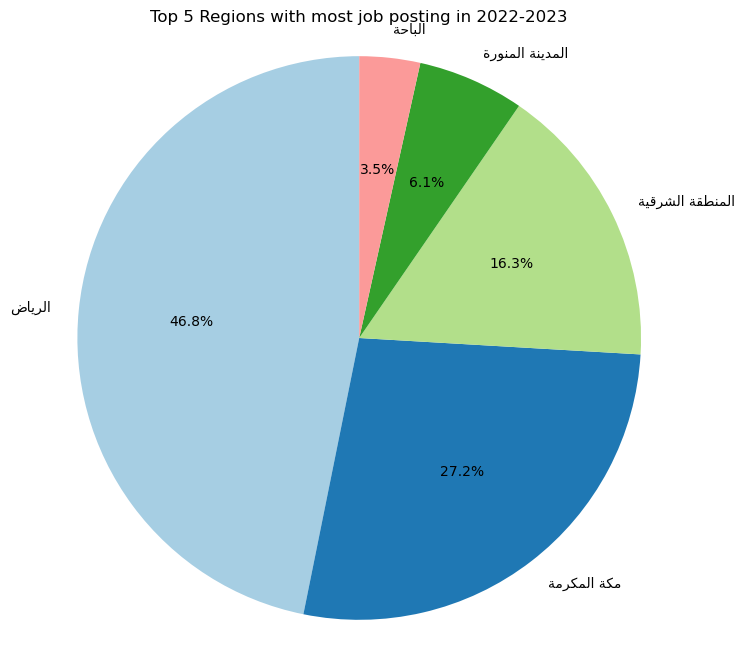

In [126]:
top_regions = jadarat_filled['region'].value_counts().head(5)


# Fixing the Arabi text problem
reshaped_labels = [arabic_reshaper.reshape(label) for label in top_regions.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=display_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Regions with most job posting in 2022-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

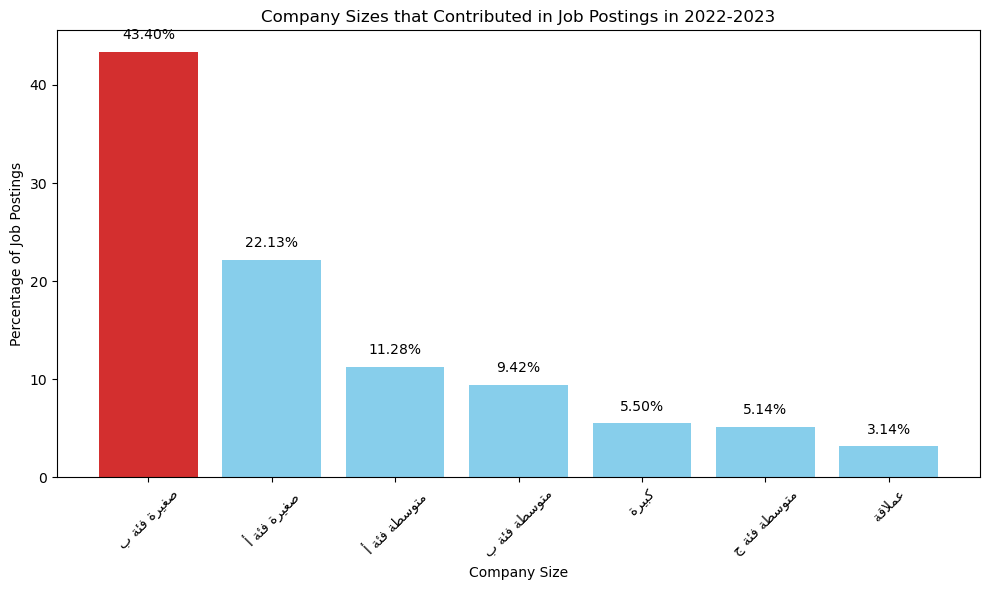

In [155]:
company_size_counts = jadarat_filled['comp_size'].value_counts()

# Calculate the total number of job postings
total_sizes = company_size_counts.sum()

# Calculate the percentage of job postings for each region
sizes_percentages = (company_size_counts / total_sizes) * 100

# Reshape and get the display version of Arabic text for x-axis labels
reshaped_labels = [arabic_reshaper.reshape(label) for label in sizes_percentages.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Define bar colors: Red for the first bar, and skyblue for the rest
bar_colors = ['#D32F2F'] + ['skyblue'] * (len(sizes_percentages) - 1)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.bar(sizes_percentages.index, sizes_percentages, color=bar_colors)

# Add labels and title
plt.xlabel('Company Size')
plt.ylabel('Percentage of Job Postings')
plt.title('Company Sizes that Contributed in Job Postings in 2022-2023')

# Rotate the x-axis labels by 45 degrees for better display
plt.xticks(rotation=45)

# Set the Arabic labels on the x-axis
plt.xticks(ticks=range(len(display_labels)), labels=display_labels)

# Show percentage values on top of the bars, with an adjusted vertical offset
for i, percentage in enumerate(sizes_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

# Display the chart with tight layout to avoid overlap
plt.tight_layout()
plt.show()

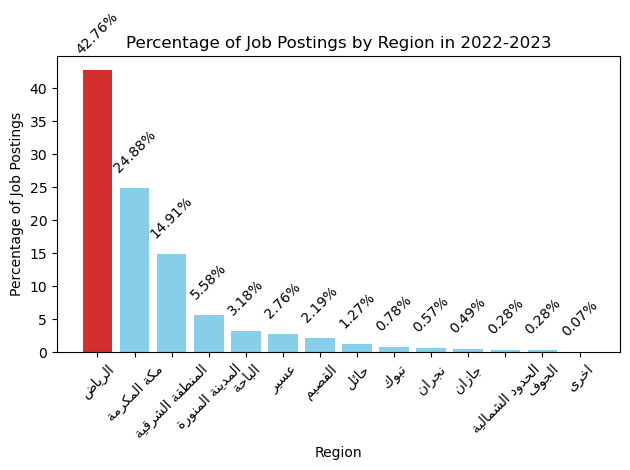

In [125]:
# Calculate the number of job postings per region
region_counts = jadarat_filled['region'].value_counts()

# Calculate the total number of job postings
total_postings = region_counts.sum()

# Calculate the percentage of job postings for each region
region_percentages = (region_counts / total_postings) * 100

reshaped_labels = [arabic_reshaper.reshape(label) for label in region_percentages.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Define bar colors: Red for the first bar, and skyblue for the rest
bar_colors = ['#D32F2F'] + ['skyblue'] * (len(region_percentages) - 1)

# Create the bar chart
plt.bar(region_percentages.index, region_percentages, color=bar_colors)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Percentage of Job Postings')
plt.title('Percentage of Job Postings by Region in 2022-2023')

# Rotate the x-axis labels by 45 degrees for better display
plt.xticks(rotation=45)

# Set the Arabic labels on the x-axis
plt.xticks(ticks=range(len(display_labels)), labels=display_labels)

# Show percentage values on top of the bars
for i, percentage in enumerate(region_percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

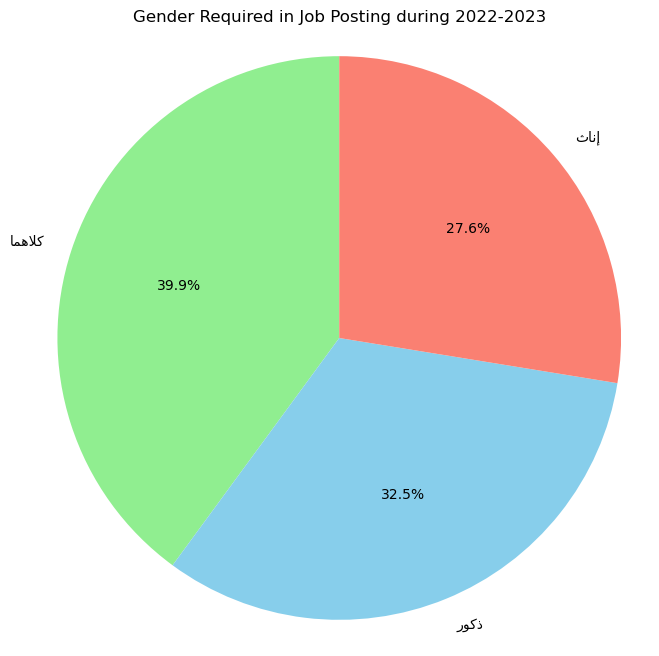

In [214]:
gender = jadarat_filled['gender'].value_counts()


# Update the gender_map if necessary to include all unique values
gender_map = {'F': 'إناث', 'M': 'ذكور', 'both': 'كلاهما'}

# Apply the mapping to the gender index
gender.index = gender.index.map(gender_map
                               )
# Reshape and get the display version of Arabic text
reshaped_labels = [arabic_reshaper.reshape(label) for label in gender.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = ['lightgreen', 'skyblue', 'salmon']  
plt.pie(gender, labels=display_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Required in Job Posting during 2022-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


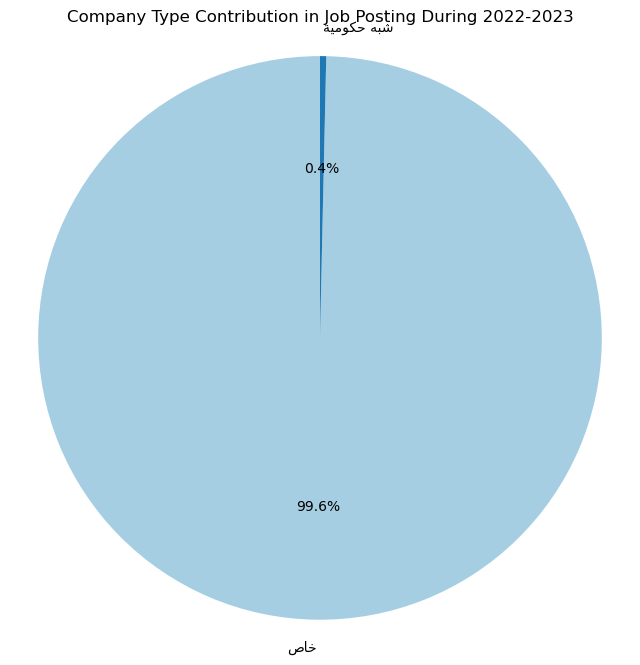

In [149]:
company_type = jadarat_filled['comp_type'].value_counts()

# Reshape and get the display version of Arabic text
reshaped_labels = [arabic_reshaper.reshape(label) for label in company_type.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_type, labels=display_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Company Type Contribution in Job Posting During 2022-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

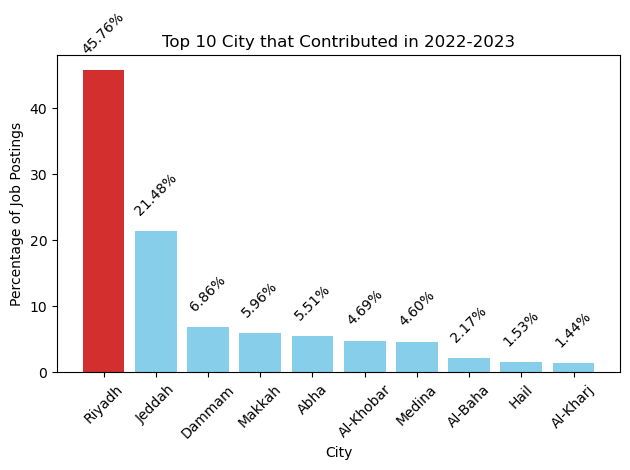

In [159]:
# Calculate the number of job postings per region
city_counts = jadarat_filled['city_corrected'].value_counts().head(10)

# Calculate the total number of job postings
total_city = city_counts.sum()

# Calculate the percentage of job postings for each region
city_percentages = (city_counts / total_city) * 100

reshaped_labels = [arabic_reshaper.reshape(label) for label in city_percentages.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Define bar colors: Red for the first bar, and skyblue for the rest
bar_colors = ['#D32F2F'] + ['skyblue'] * (len(city_percentages) - 1)

# Create the bar chart
plt.bar(city_percentages.index, city_percentages, color=bar_colors)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Percentage of Job Postings')
plt.title('Top 10 City that Contributed in 2022-2023')

# Rotate the x-axis labels by 45 degrees for better display
plt.xticks(rotation=45)

# Set the Arabic labels on the x-axis
plt.xticks(ticks=range(len(display_labels)), labels=display_labels)

# Show percentage values on top of the bars
for i, percentage in enumerate(city_percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

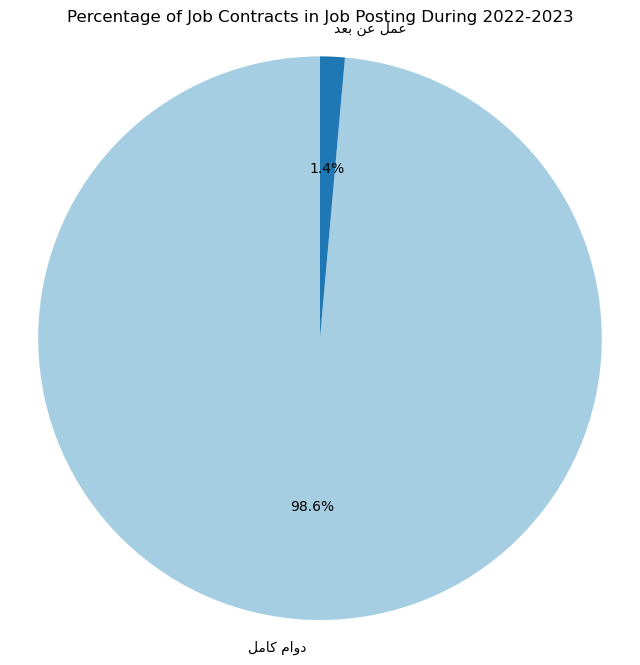

In [161]:
contracts = jadarat_filled['contract'].value_counts()

# Reshape and get the display version of Arabic text
reshaped_labels = [arabic_reshaper.reshape(label) for label in contracts.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(contracts, labels=display_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Job Contracts in Job Posting During 2022-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

C:\Users\sakur\AppData\Local\Temp\ipykernel_40880\2946429318.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_job_postings = jadarat_filled_2022.groupby(pd.Grouper(key='job_date_gregorian', freq='M')).size()


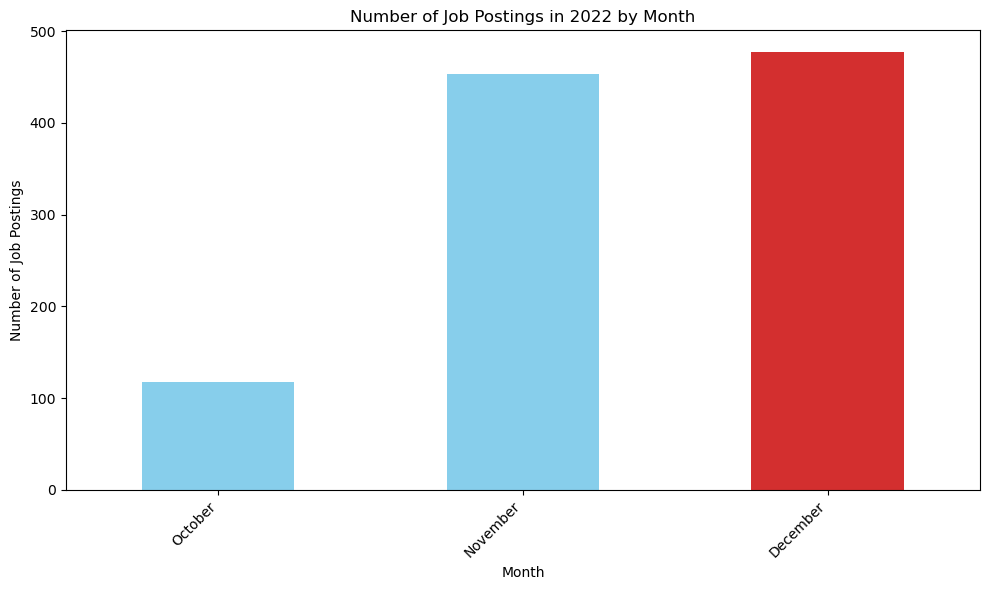

In [172]:
jadarat_filled_2022 = jadarat_filled[jadarat_filled['job_date_gregorian'].dt.year == 2022]

monthly_job_postings = jadarat_filled_2022.groupby(pd.Grouper(key='job_date_gregorian', freq='M')).size()

max_value_index = monthly_job_postings.idxmax()

colors = ['#D32F2F' if date == max_value_index else 'skyblue' for date in monthly_job_postings.index]

plt.figure(figsize=(10, 6))
monthly_job_postings.plot(kind='bar', color=colors)

plt.title('Number of Job Postings in 2022 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')

plt.xticks(ticks=range(len(monthly_job_postings)), labels=monthly_job_postings.index.month_name(), rotation=45, ha='right')

plt.tight_layout()  
plt.show()


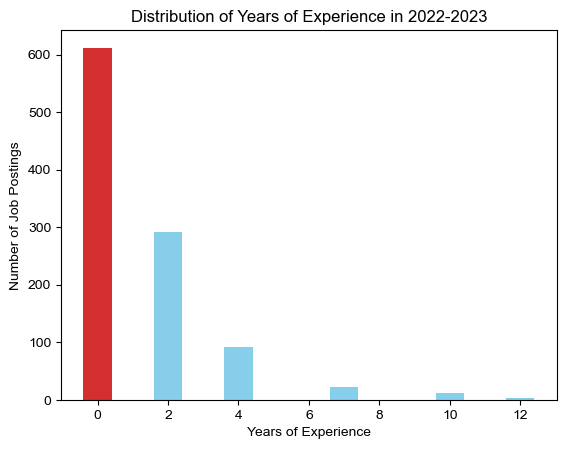

In [232]:
experience_counts = jadarat_no_outliers['experience (Years)'].value_counts().sort_index()

plt.bar(experience_counts.index, experience_counts.values, color='skyblue')

max_count_index = experience_counts.idxmax() 
plt.bar(max_count_index, experience_counts[max_count_index], color='#D32F2F')

plt.title('Distribution of Years of Experience in 2022-2023')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Job Postings')

plt.show()

In [239]:
jadarat_no_outliers['job_title'].unique()

array(['محاسب', 'بائع', 'أخصائي عمليات موارد بشرية', 'ميكانيكي سيارات',
       'مراقب كاميرات أمنية', 'سكرتير تنفيذي', 'مدير مكتب',
       'أخصائي إدارة مشاريع', 'مصمم جرافيك', 'مدير حساب عميل',
       'مدخل بيانات', 'مطور برامج', 'أخصائي إدارة اداء', 'كيميائي',
       'مهندس زراعي', 'مدير عام', 'كاتب علاقات حكومية', 'مندوب مبيعات',
       'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'أخصائي تسويق',
       'أخصائي خدمة عملاء', 'معلم صفوف أولية', 'مساعد طب بيطري', 'صيدلي',
       'بائع مأكولات ومشروبات', 'خطاط', 'منسق زهور', 'مدير فرع',
       'فني تدفئة وتهوية وتكييف', 'مدير رقابة ادارية',
       'موظف صندوق محاسبة', 'مدير تسويق', 'مدير تدريب', 'حارس أمن',
       'نادل', 'كاتب موارد بشرية', 'معلم ثانوي أحياء',
       'معلم ثانوي لغة عربية', 'مساعد إداري', 'مهندس مدني',
       'فني مختبر طبي', 'فني هندسة إلكترونية', 'سكرتير', 'مشرف مسكن',
       'محلل نظم المعلومات', 'عامل كاونتر مأكولات ومشروبات', 'فني طوابع',
       'طاهي', 'صراف

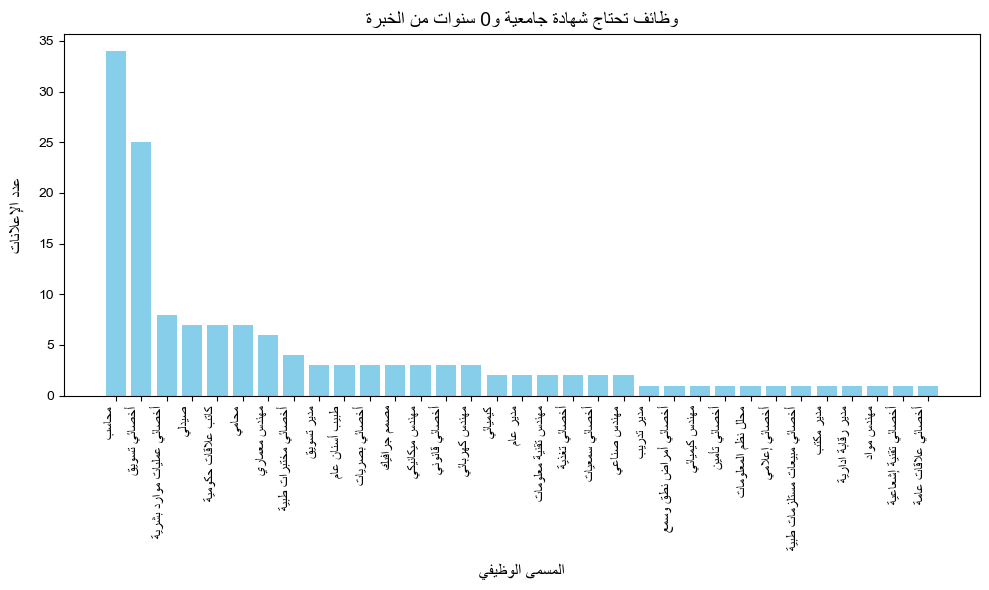

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Your list of job titles that require a university degree
degree_required_jobs = [
    'محاسب', 'أخصائي عمليات موارد بشرية', 'مدير مكتب', 'أخصائي إدارة مشاريع', 'مصمم جرافيك', 
    'مدير حساب عميل', 'مطور برامج', 'أخصائي إدارة اداء', 'كيميائي', 'مهندس زراعي', 'مدير عام', 
    'كاتب علاقات حكومية', 'مهندس كهربائي', 'مهندس ميكانيكي', 'أخصائي تسويق',
    'صيدلي', 'مدير رقابة ادارية', 'مدير تسويق', 'مدير تدريب', 'محلل نظم المعلومات',
    'أخصائي توظيف', 'أخصائي تغذية', 'مهندس مواد', 'طبيب أسنان عام', 'أخصائي مختبرات طبية', 
    'محامي', 'أخصائي سمعيات', 'مهندس معماري', 'أخصائي قانوني', 'أخصائي شؤون قانونية',
    'أخصائي تقنية إشعاعية', 'مدير برمجيات', 'أخصائي علوم حشرات', 'أخصائي إعلامي', 'أخصائي مبيعات مستلزمات طبية', 
    'أخصائي بصريات', 'مراجع داخلي', 'مدير موارد بشرية أمن سيبراني', 'مبرمج تطبيقات', 'مهندس صناعي', 
    'أخصائي علاقات عامة', 'مدير بحث وتطوير', 'مهندس كيميائي', 'مهندس بيئي', 'مهندس تقنية معلومات', 
    'مهندس إدارة مشاريع', 'أخصائي تأمين', 'رئيس منظمة غير ربحية', 'أخصائي أمراض نطق وسمع', 
    'مدير إدارة مشاريع'
]

# Assuming 'jadarat_no_outliers' is your dataframe, make sure it is defined before using
# Example: jadarat_no_outliers = pd.read_csv("your_data.csv")  # You would load your actual data here

# Filter the dataframe for 0 years of experience and jobs requiring a degree
zero_experience_data = jadarat_no_outliers[
    (jadarat_no_outliers['experience (Years)'] == 0) & 
    (jadarat_no_outliers['job_title'].isin(degree_required_jobs))
]

# Count the number of occurrences of each job title
job_title_counts = zero_experience_data['job_title'].value_counts()

# Function to reshape Arabic text
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)  # Reshapes the text
    return get_display(reshaped_text)  # Makes it display correctly

# Reshape the job titles
reshaped_job_titles = [reshape_arabic(job) for job in job_title_counts.index]

# Set the reshaped title and axis labels
plt.figure(figsize=(10,6))
plt.bar(reshaped_job_titles, job_title_counts.values, color='skyblue')
title = reshape_arabic('وظائف حديثي التخرج في عامي 2022-2023')
plt.title(title, fontsize=14, loc='center')

xlabel = reshape_arabic('المسمى الوظيفي')
plt.xlabel(xlabel, fontsize=12, labelpad=10)

ylabel = reshape_arabic('عدد الإعلانات')
plt.ylabel(ylabel, fontsize=12, labelpad=10)

# Plot the bar chart with reshaped job titles


# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


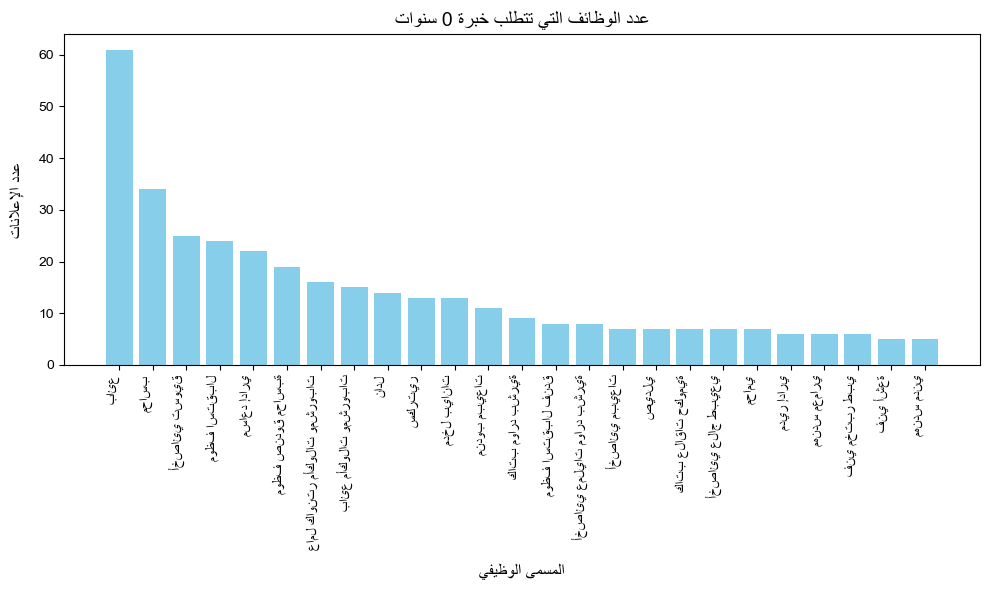

In [244]:
import matplotlib.pyplot as plt

# Filter the data to only include rows where the experience is 0 years
zero_experience_data = jadarat_no_outliers[jadarat_no_outliers['experience (Years)'] == 0]
# Count the number of job titles with 0 experience
job_title_counts = zero_experience_data['job_title'].value_counts().head(25)

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(job_title_counts.index, job_title_counts.values, color='skyblue')

# Set the title and axis labels with reshaped Arabic text if needed
title = arabic_reshaper.reshape('عدد الوظائف التي تتطلب خبرة 0 سنوات')
title = get_display(title)

xlabel = arabic_reshaper.reshape('المسمى الوظيفي')
xlabel = get_display(xlabel)

ylabel = arabic_reshaper.reshape('عدد الإعلانات')
ylabel = get_display(ylabel)

# Set the title and axis labels
plt.title(title, fontsize=14, loc='center')
plt.xlabel(xlabel, fontsize=12, labelpad=10)
plt.ylabel(ylabel, fontsize=12, labelpad=10)

# Adjust tick labels for RTL (right-to-left)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [128]:
from ipyvizzu import Chart, Data, Config

regions_countribution = jadarat_filled['region'].value_counts()
regions_df = pd.DataFrame({
    'Region': regions_countribution.index,
    'Value': regions_countribution.values
})

data = Data()
data.add_df(regions_df)

chart = Chart(width="640px", height="360px")

chart.animate(data)

chart.animate(
    Config(
        {
            "x": "Region",
            "y": "Value",
            "title": "Countries contributing to job posting in 2022-2023",
        }
    )
)


In [129]:
from ipyvizzu import Chart, Data, Config

data = Data()
data.add_df(top_regions_df)

chart = Chart(width="640px", height="360px")

chart.animate(data)

chart.animate(
    Config(
        {
            "x": "Region",
            "y": "Value",
            "title": "Top 5 countries contributing to job posting in 2022-2023 ",
        }
    )
)


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

Text(0, 0.5, 'Count')

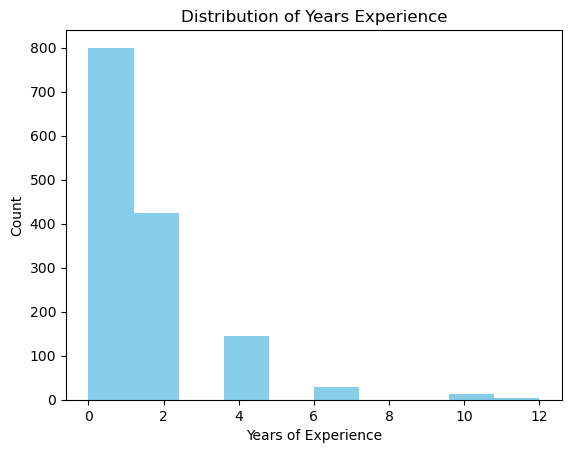

In [223]:
# We see natural outliers here
plt.hist(jadarat_filled['experience (Years)'], color='skyblue')
plt.title('Distribution of Years Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')

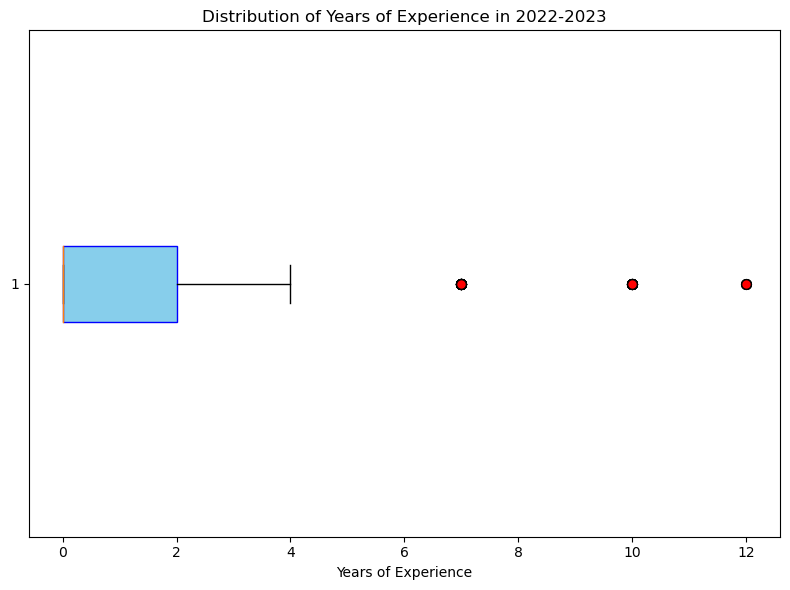

In [175]:
# We see natural outliers here
plt.figure(figsize=(8, 6))
plt.boxplot(jadarat_filled['experience (Years)'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=7))

plt.title('Distribution of Years of Experience in 2022-2023')
plt.xlabel('Years of Experience')

plt.tight_layout()  
plt.show()

<p style=font-size:18px><b>Zeros are dropped in data cleaning section</b><p>

Text(0, 0.5, 'Count')

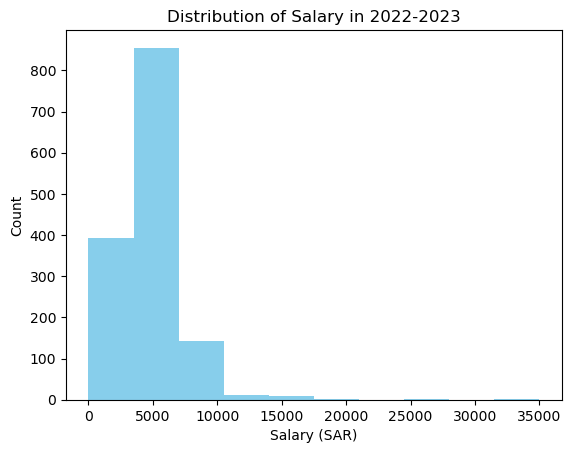

In [132]:
# We should drop the zeros 
plt.hist(jadarat_filled['salary_sep'], color='skyblue')
plt.title('Distribution of Salary in 2022-2023')
plt.xlabel('Salary (SAR)')
plt.ylabel('Count')

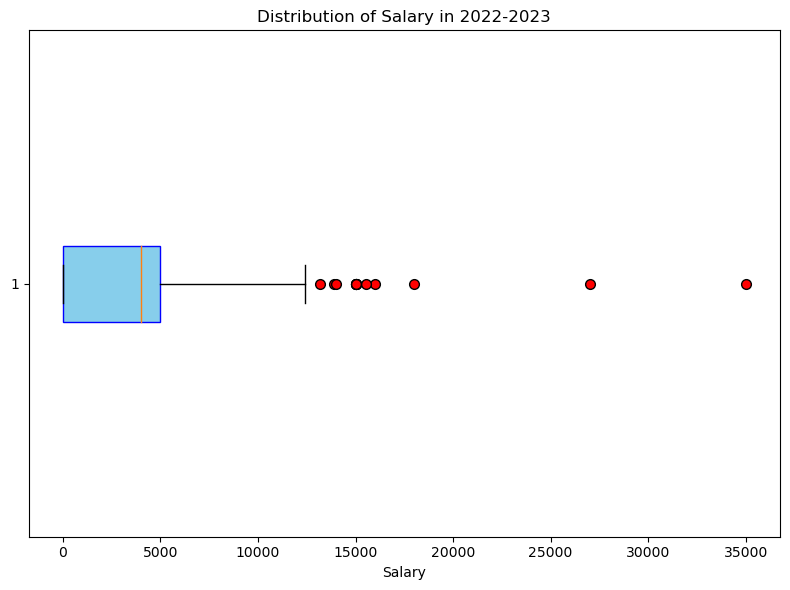

In [176]:
plt.figure(figsize=(8, 6))
plt.boxplot(jadarat_filled['salary_sep'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=7))

plt.title('Distribution of Salary in 2022-2023')
plt.xlabel('Salary')

plt.tight_layout()  
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

<p style=font-size:16px>we see here, that both the z-score and quartiles considered experience years 7-12 are considered as outliers, but they are natualroutliers becase Jadarat is not specifically for fresh graduate or people with a little experienceit is mainly for job hunters.</p>

In [190]:
z_scores = zscore(jadarat_no_outliers['experience (Years)'])
outliers = np.abs(z_scores) > 3
outlier_values = jadarat_no_outliers['experience (Years)'][outliers]
print(outlier_values)

17      10
82       7
163      7
166      7
167      7
170      7
174      7
229     12
246     12
422      7
428      7
429     10
458     12
506     10
558     10
628      7
749     10
841     10
947     10
1132    10
1144     7
1169    10
1180     7
1190     7
1204     7
1247     7
1249     7
1250     7
1251     7
1252     7
1254    10
1255    10
1296     7
1317     7
1408     7
1421     7
Name: experience (Years), dtype: int64


In [191]:
Q1 = jadarat_no_outliers['experience (Years)'].quantile(0.25)
Q3 = jadarat_no_outliers['experience (Years)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = jadarat_no_outliers['experience (Years)'][(jadarat_no_outliers['experience (Years)'] < lower_bound) | (jadarat_no_outliers['experience (Years)'] > upper_bound)]
print(outliers)

17      10
82       7
163      7
166      7
167      7
170      7
174      7
229     12
246     12
422      7
428      7
429     10
458     12
506     10
558     10
628      7
749     10
841     10
947     10
1132    10
1144     7
1169    10
1180     7
1190     7
1204     7
1247     7
1249     7
1250     7
1251     7
1252     7
1254    10
1255    10
1296     7
1317     7
1408     7
1421     7
Name: experience (Years), dtype: int64


<p style=font-size:16px;>These are natural outlires. Therefore, we're keeping them.</p>

In [198]:
z_scores = zscore(jadarat_no_outliers['salary_sep'])
outliers = np.abs(z_scores) > 3
outlier_values = jadarat_no_outliers['salary_sep'][outliers]
print('The salary outlires are in range of', outlier_values.min(), 'and', outlier_values.max())

The salary outlires are in range of 12000.0 and 35000.0


In [201]:
Q1 = jadarat_no_outliers['salary_sep'].quantile(0.25)
Q3 = jadarat_no_outliers['salary_sep'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = jadarat_no_outliers['salary_sep'][(jadarat_no_outliers['salary_sep'] < lower_bound) | (jadarat_no_outliers['salary_sep'] > upper_bound)]
print('The salary outlires are in range of', outliers.min(), 'and', outliers.max())

The salary outlires are in range of 9259.0 and 35000.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

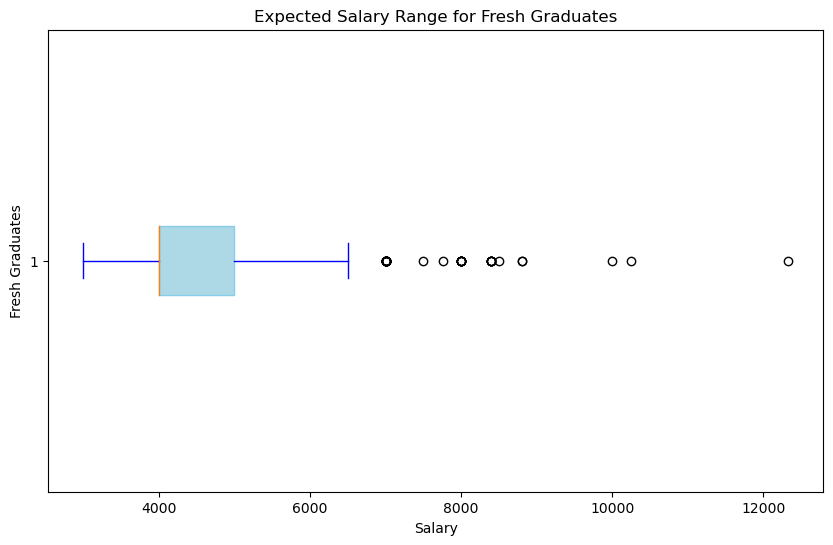

In [218]:
fresh_graduates = jadarat_no_outliers[jadarat_no_outliers['experience (Years)'] == 0]


plt.figure(figsize=(10, 6))
plt.boxplot(fresh_graduates['salary_sep'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='skyblue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'))

plt.title('Expected Salary Range for Fresh Graduates')
plt.xlabel('Salary')
plt.ylabel('Fresh Graduates')

plt.show()


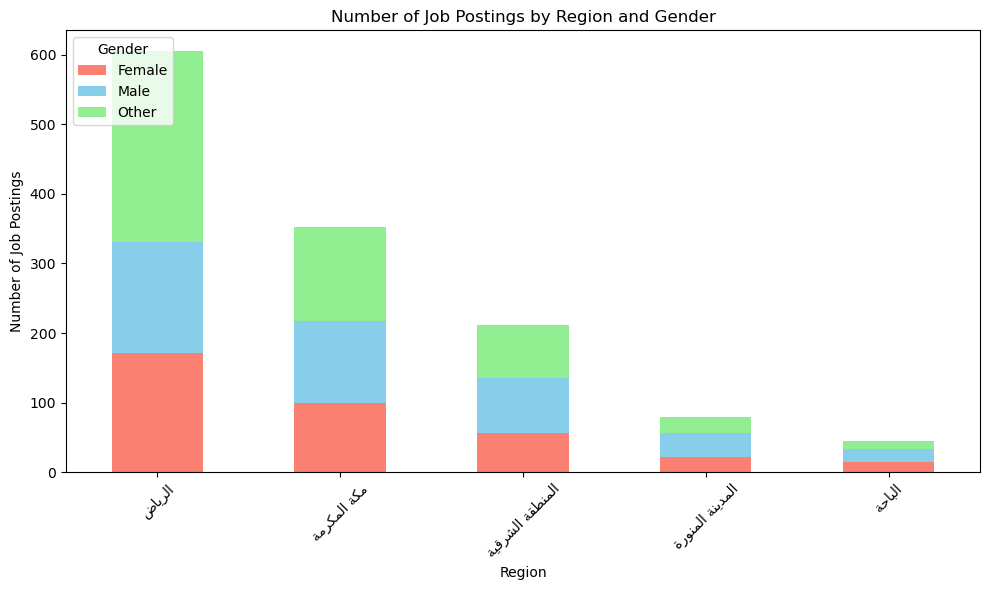

In [208]:
top_regions = jadarat_filled['region'].value_counts().sort_values(ascending=False).head(5)

top_regions_data = jadarat_filled[jadarat_filled['region'].isin(top_regions.index)]

gender_region_count = top_regions_data.groupby(['region', 'gender']).size().unstack(fill_value=0)

gender_region_count = gender_region_count.loc[gender_region_count.sum(axis=1).sort_values(ascending=False).index]

reshaped_labels = [arabic_reshaper.reshape(label) for label in gender_region_count.index]
display_labels = [get_display(label) for label in reshaped_labels]

gender_region_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue', 'lightgreen'])

plt.title('Number of Job Postings by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.xticks(range(len(gender_region_count.index)), display_labels, rotation=45)
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male', 'Other'])

plt.tight_layout()

plt.show()


# Key insights

## Top 10 Regions Contributed in Job Posting in 2022-2023

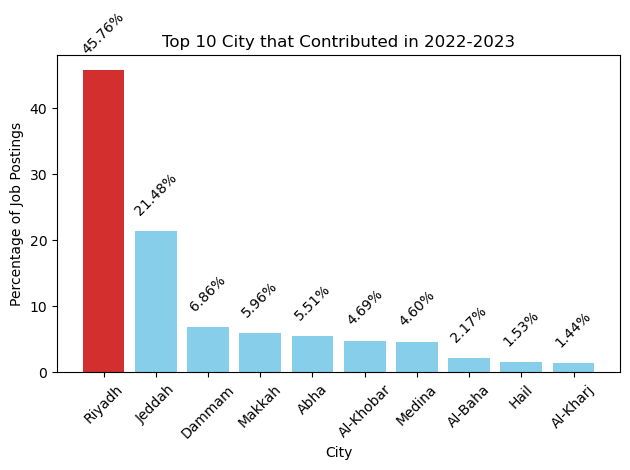

## There are no Gender Prefrence in Job Postings in 2022-2023

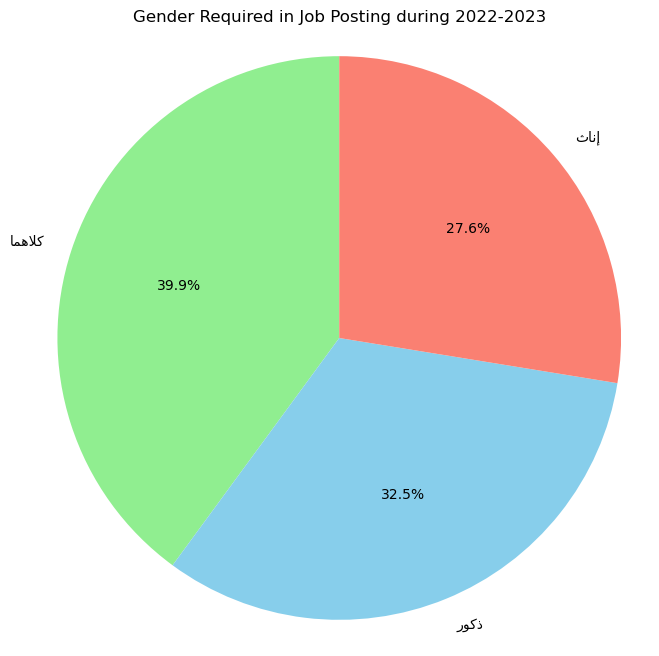

## The Most Jobs Requires Fresh Graduates!

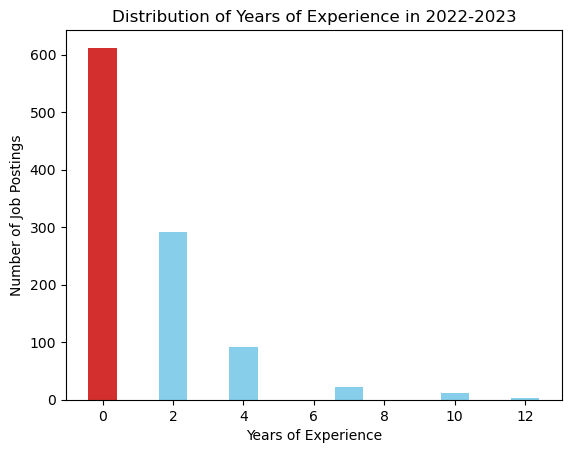

## Expected Salary for Fresh Graduate

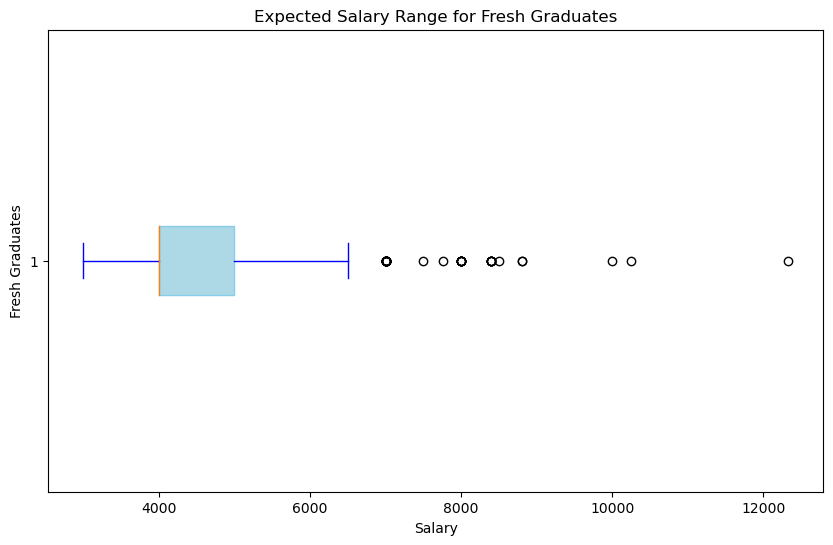

## The last two months of the last year quarter exhibits the highest job postings in 2022

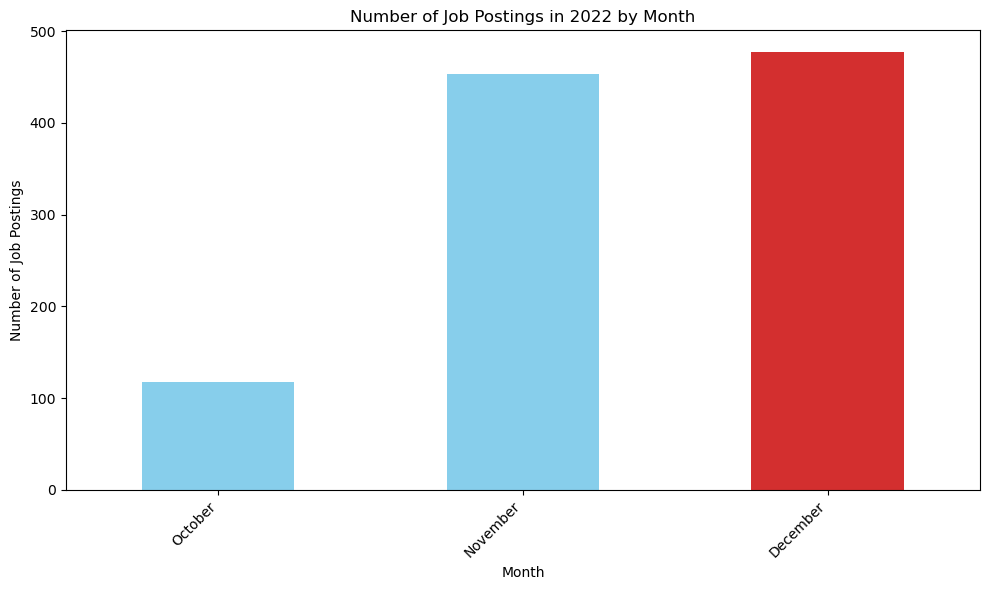